In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [13]:
data = pd.read_csv('./dataset/imdb_top_1000.csv')
X = np.array(data.Overview)

In [14]:
data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [15]:
data = data[['Genre','Overview','Series_Title']]
data.head()

,Genre,Overview,Series_Title
0,Drama,Two imprisoned men bond over a number of years...,The Shawshank Redemption
1,"Crime, Drama",An organized crime dynasty's aging patriarch t...,The Godfather
2,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,The Dark Knight
3,"Crime, Drama",The early life and career of Vito Corleone in ...,The Godfather: Part II
4,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,12 Angry Men


## Proceding with Data transform
1. Use BERT to convert our text into a vector
2. Get the cosine similarity (the cosine of the angle between the two vectors) of a fixed movie (vector) and all the other ones
3. Pick the movies (vectors) with the largest cosine similarity. We are going to pick 5 of them.

In [16]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Batches: 100%|██████████| 32/32 [00:31<00:00,  1.02it/s]


In [18]:
X = np.array(embeddings)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,2.986181,1.695297,4.334532,-2.355039,2.235685
1,-0.131721,0.887934,4.695468,-2.713230,-1.791322
2,-5.688415,-1.776848,-0.750698,-0.705550,4.123846
3,-1.211431,4.458816,1.582359,-3.536123,-2.343251
4,-0.971365,-2.374317,3.172325,3.072342,-0.172608


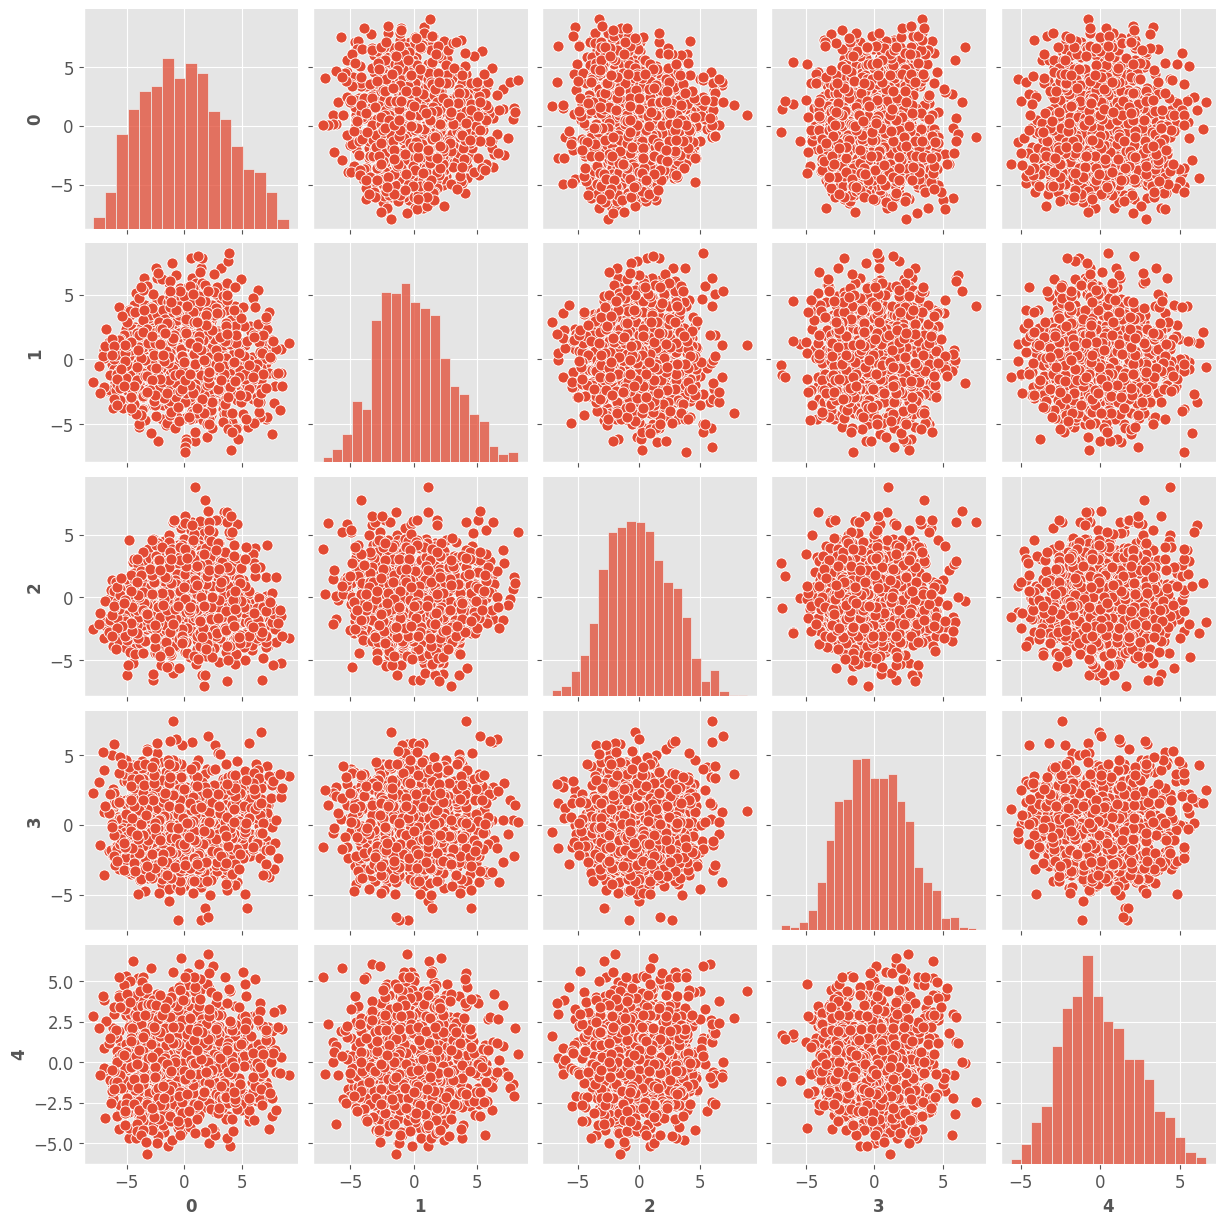

In [19]:
sns.pairplot(pca_data)

In [20]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  movies_recomm =  data['Series_Title'].loc[index_recomm].values
  result = {'Movies':movies_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The watched movie is this one: %s \n'%(data['Series_Title'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('The number %i recommended movie is this one: %s \n'%(k,movie))
  if print_recommendation_plots==True:
    print('The plot of the watched movie is this one:\n %s \n'%(data['Overview'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Overview'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the watched movie is this one:\n %s \n'%(data['Genre'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Genre'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

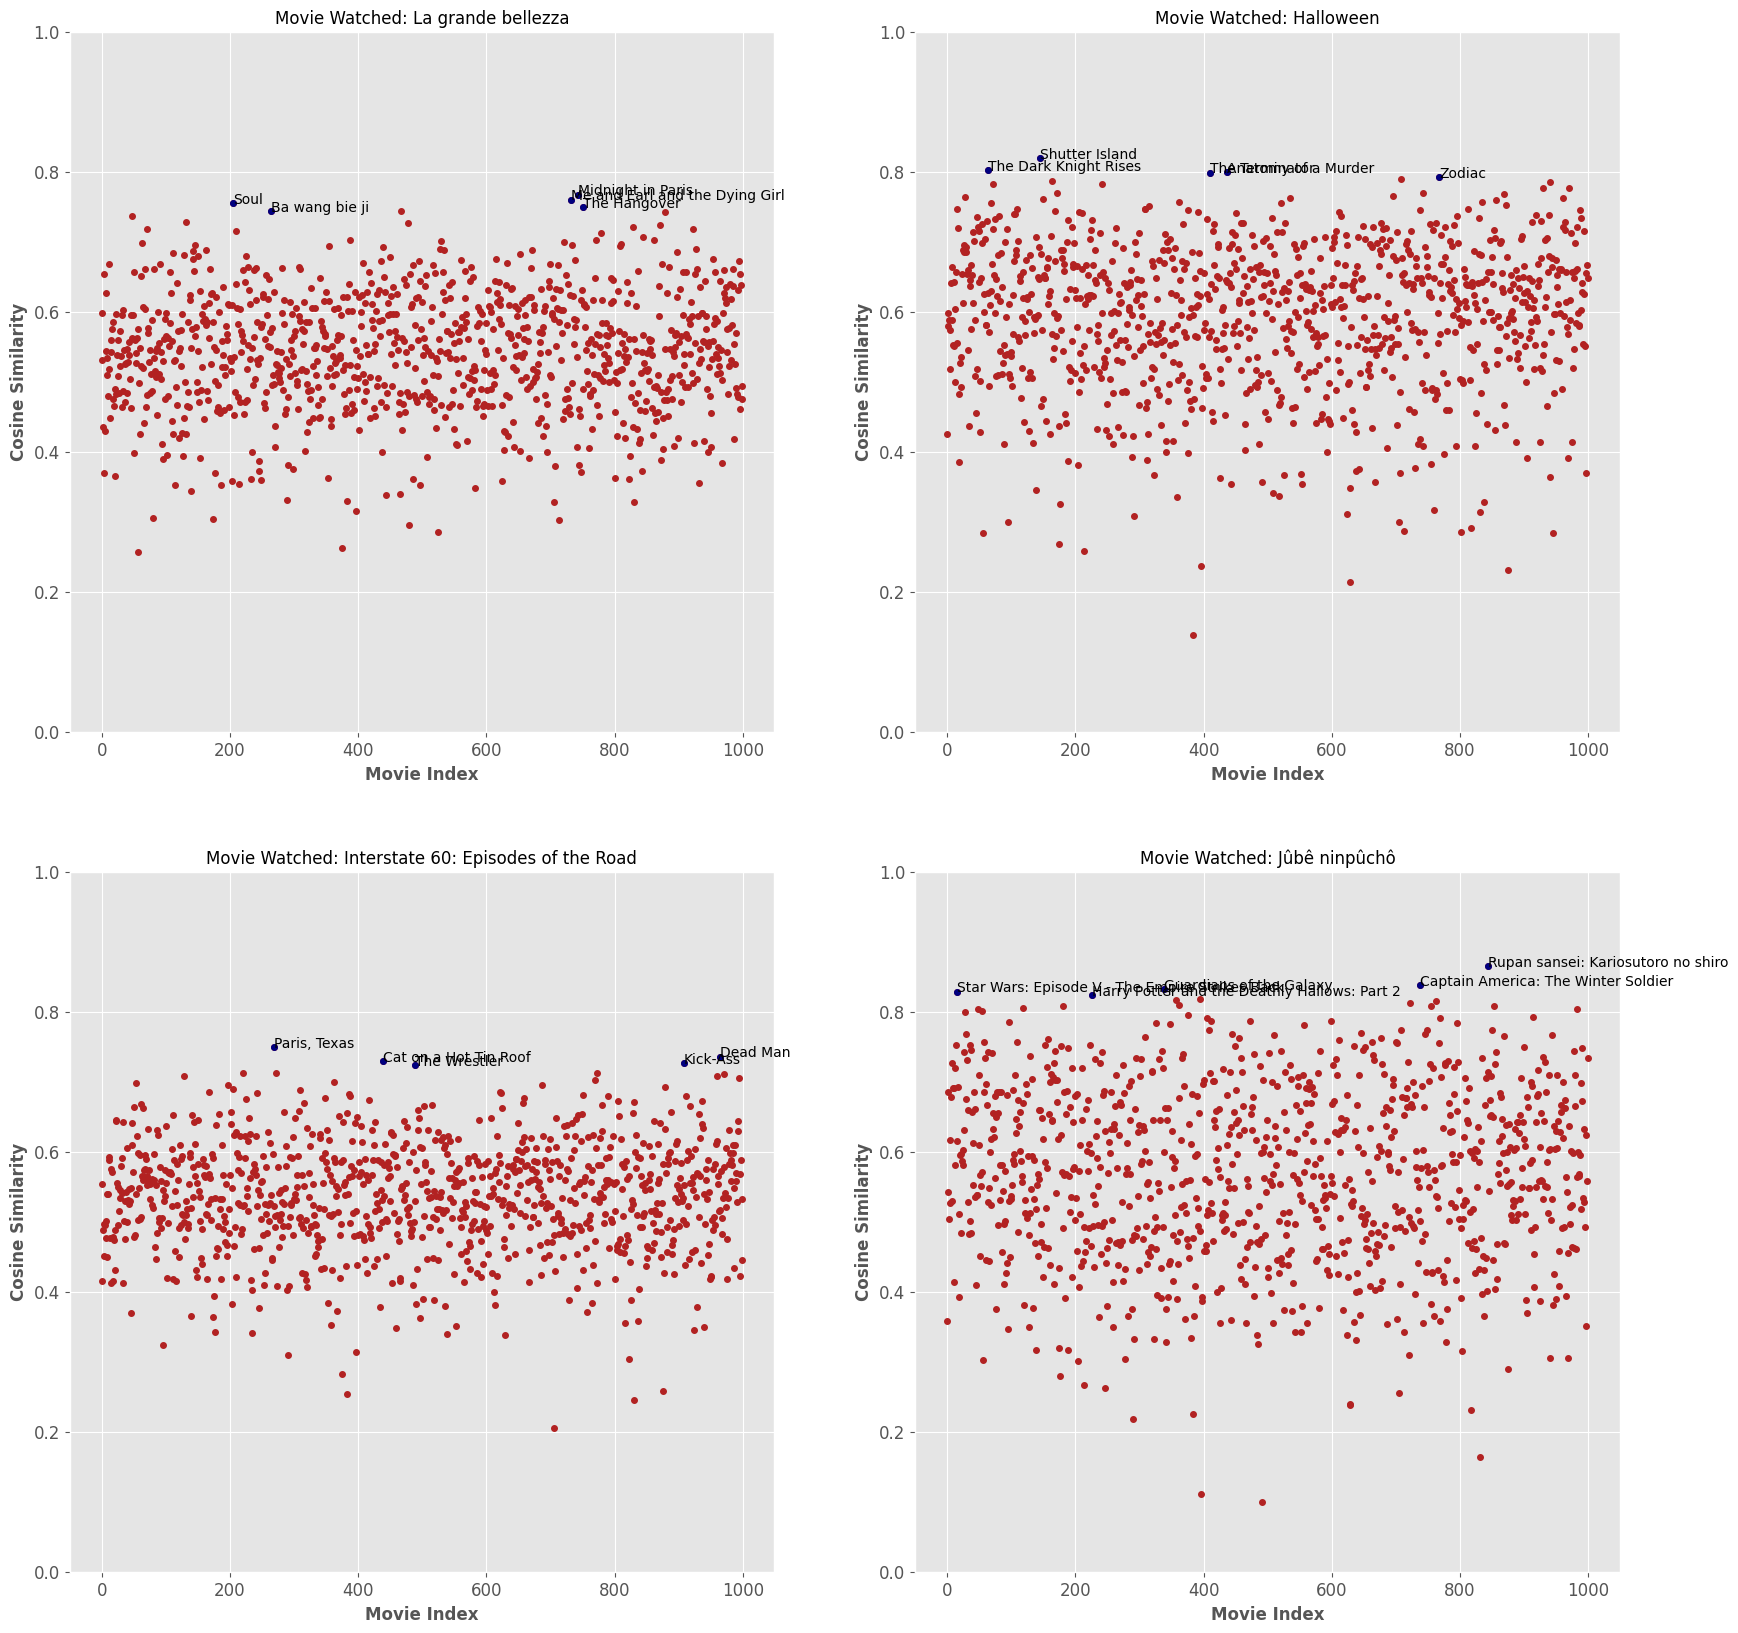

In [21]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Movies']
  plt.plot(x,y,'.',color='navy',label='Recommended Movies')
  plt.title('Movie Watched: '+data['Series_Title'].loc[index])
  plt.xlabel('Movie Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [23]:
give_recommendations(2,True)

The watched movie is this one: The Dark Knight 

The number 1 recommended movie is this one: Joker 

The number 1 recommended movie is this one: Dirty Harry 

The number 1 recommended movie is this one: Batman Begins 

The number 1 recommended movie is this one: Guardians of the Galaxy 

The number 1 recommended movie is this one: Death Note: Desu nôto 



{'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object),
 'Index': [33, 853, 155, 339, 762]}

In [22]:
give_recommendations(2,False,True)

The plot of the watched movie is this one:
 When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice. 

The plot of the number 1 recommended movie is this one:
 In Gotham City, mentally troubled comedian Arthur Fleck is disregarded and mistreated by society. He then embarks on a downward spiral of revolution and bloody crime. This path brings him face-to-face with his alter-ego: the Joker. 

The plot of the number 2 recommended movie is this one:
 When a madman calling himself "the Scorpio Killer" menaces the city, tough-as-nails San Francisco Police Inspector "Dirty" Harry Callahan is assigned to track down and ferret out the crazed psychopath. 

The plot of the number 3 recommended movie is this one:
 After training with his mentor, Batman begins his fight to free crime-ridden Gotham City from corruption. 

The plot of the number 4 recommended movie is t

{'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object),
 'Index': [33, 853, 155, 339, 762]}

In [24]:
give_recommendations(65,True,True,True)

The watched movie is this one: Taare Zameen Par 

The number 1 recommended movie is this one: Jagten 

The number 1 recommended movie is this one: What's Eating Gilbert Grape 

The number 1 recommended movie is this one: Scent of a Woman 

The number 1 recommended movie is this one: The Boy in the Striped Pyjamas 

The number 1 recommended movie is this one: Harry Potter and the Sorcerer's Stone 

The plot of the watched movie is this one:
 An eight-year-old boy is thought to be a lazy trouble-maker, until the new art teacher has the patience and compassion to discover the real problem behind his struggles in school. 

The plot of the number 1 recommended movie is this one:
 A teacher lives a lonely life, all the while struggling over his son's custody. His life slowly gets better as he finds love and receives good news from his son, but his new luck is about to be brutally shattered by an innocent little lie. 

The plot of the number 2 recommended movie is this one:
 A young man in a 

{'Movies': array(['Jagten', "What's Eating Gilbert Grape", 'Scent of a Woman',
        'The Boy in the Striped Pyjamas',
        "Harry Potter and the Sorcerer's Stone"], dtype=object),
 'Index': [88, 658, 398, 616, 947]}

In [25]:
recomm_list = []
for i in range(len(X)):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Movies'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Watched Movie'] = data['Series_Title']
recomm_data = recomm_data[['Watched Movie','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [26]:
recomm_data.sample(frac=1).head()

,Watched Movie,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
430,Doctor Zhivago,On Golden Pond,Viskningar och rop,The Broken Circle Breakdown,Manhattan,Hannah and Her Sisters
767,Zodiac,Dirty Harry,Se7en,The Untouchables,L.A. Confidential,The Silence of the Lambs
807,The Fifth Element,Star Wars: Episode VII - The Force Awakens,Guardians of the Galaxy,G.O.R.A.,Vikram Vedha,Mysterious Skin
215,12 Years a Slave,Stalag 17,American Gangster,Just Mercy,Glory,Ben-Hur
945,The Royal Tenenbaums,Guardians of the Galaxy Vol. 2,Ordinary People,The Odd Couple,The Kid,The Graduate
